In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs

from utils.get_raw_data import (
    get_raw_data_array,
    locate_raw_data,
    get_raw_data_array_from_filename,
    sum_multiple_data_arrays,
    get_multiple_data_arrays,
)
from utils.getting_spectral_lines_from_hspy import get_the_lines_from_hspy
from utils.helper_plotting import plotly_plot_multiple_spectra, plot_multiple_spectra

In [2]:
lines = get_the_lines_from_hspy()
emsa = locate_raw_data()
# emsa

In [3]:
only30 = get_multiple_data_arrays(filters=["30kV"])
sum30, sum30_names = sum_multiple_data_arrays(only30, normalize=False)

Summed 6 arrays: Cu_30kV, Fe_30kV, GaAs_30kV, Mo_30kV, NW_30kV, Si_30kV


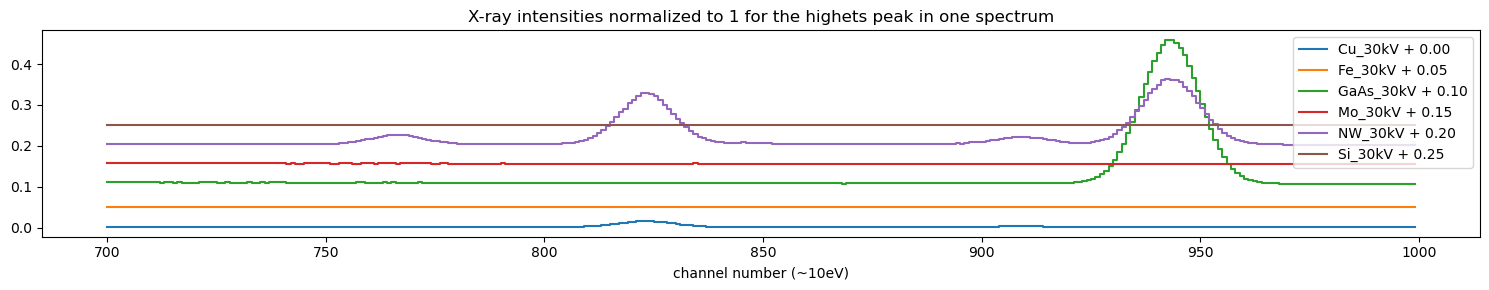

In [4]:
plot_multiple_spectra(only30, start=700, stop=1000, normalize=False, split=0.05)

In [5]:
s = hs.load(emsa[6], signal_type="EDS_SEM")
s.add_elements(["Ga", "As"])
# s.plot(xray_lines=True)

m = s.isig[8.0:13.0].create_model()
# m.add_family_lines(['Ga_Ka', 'As_Ka', 'As_Kb', 'Ga_Kb'])
m.add_family_lines(["Ga_Ka", "As_Ka"])
m.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |  background_order_6 |  background_order_6 |          Polynomial
   1 |               As_Ka |               As_Ka |            Gaussian
   2 |               As_Kb |               As_Kb |            Gaussian
   3 |               Ga_Ka |               Ga_Ka |            Gaussian
   4 |               Ga_Kb |               Ga_Kb |            Gaussian

In [6]:
def summaryGaAs():
    m.components.Ga_Ka.summary()
    m.components.Ga_Kb.summary()
    m.components.As_Ka.summary()
    m.components.As_Kb.summary()
summaryGaAs()

A = 400993.99557826924 ± nan 
centre = 9.2517 ± None 
sigma = 0.06752308621063911 ± None 
centre = 10.2642 ± None 
sigma = 0.07082262985226316 ± None 
A = 238694.42830899928 ± nan 
centre = 10.5436 ± None 
sigma = 0.0717064167975802 ± None 
centre = 11.7262 ± None 
sigma = 0.07533243787371295 ± None 


In [7]:
# s.isig[8.:13.].plot(xray_lines=True)

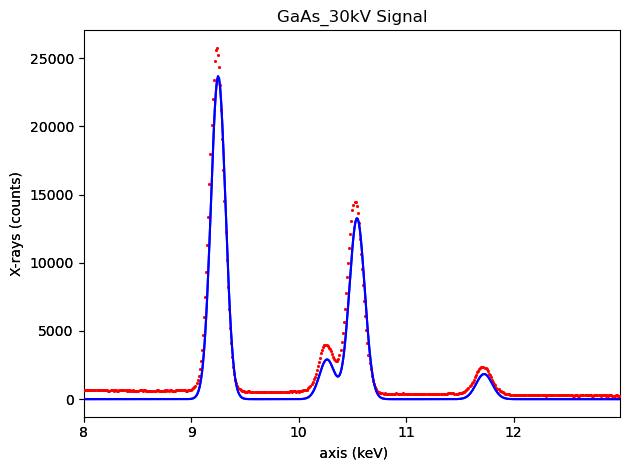

In [8]:
m.plot()

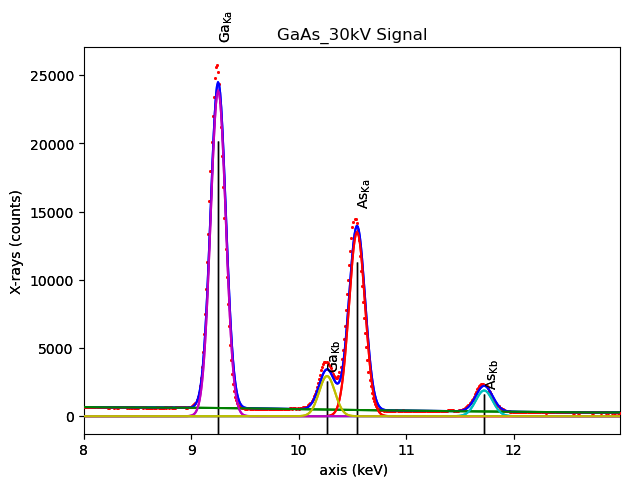

In [9]:
m.fit(optimizer="lm", bounded=True)
m.fit_background()
m.calibrate_energy_axis()
m.plot(plot_components=True, xray_lines=True)
# m.print_current_values(fancy=True)

In [10]:
summaryGaAs()

A = 422476.61542387906 ± 4389.966567179087 
centre = 9.2517 ± None 
sigma = 0.07052199500751188 ± 0.0008282132363755495 
centre = 10.2642 ± None 
sigma = 0.0736873768539823 ± None 
A = 252458.27019960887 ± 4562.330374417058 
centre = 10.5436 ± None 
sigma = 0.07453720425652162 ± 0.0015718354598342114 
centre = 11.7262 ± None 
sigma = 0.07803179354870007 ± None 


In [11]:
sI = m.get_lines_intensity()[:2]
print(f"I: {sI[0].data} from {sI[0]}")
print(f"I: {sI[1].data} from {sI[1]}")

I: [252458.27019961] from <BaseSignal, title: Intensity of As_Ka at 10.54 keV from GaAs_30kV, dimensions: (1|)>
I: [422476.61542388] from <BaseSignal, title: Intensity of Ga_Ka at 9.25 keV from GaAs_30kV, dimensions: (1|)>


In [12]:
def use_hspy_to_fit_and_plot(
    filenr, elements, family_lines, start, stop, xray_lines=True, plot_components=False
):
    """ """
    s = hs.load(emsa[filenr], signal_type="EDS_SEM")
    s.add_elements(elements)
    # Plot 1
    s.plot(xray_lines=True)
    # making the model
    m = s.isig[start:stop].create_model()
    m.add_family_lines(family_lines)
    print("The components of the model:")
    print(m.components)
    # fitting the background
    m.fit()
    m.fit_background()
    m.calibrate_energy_axis()
    # Plot 2
    m.plot(plot_components, xray_lines=True)
    sI = m.get_lines_intensity()[:3]
    for result in sI:
        print(f"{result.data}, {result}")
    print("Plot 1: the whole spectrum")
    print("Plot 2: the model with the background fitted, and the X-ray lines")
    return m

The components of the model:
   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |  background_order_6 |  background_order_6 |          Polynomial
   1 |               As_Ka |               As_Ka |            Gaussian
   2 |               As_Kb |               As_Kb |            Gaussian
   3 |               Ga_Ka |               Ga_Ka |            Gaussian
   4 |               Ga_Kb |               Ga_Kb |            Gaussian
[252459.71871561], <BaseSignal, title: Intensity of As_Ka at 10.54 keV from GaAs_30kV, dimensions: (1|)>
[422475.64976469], <BaseSignal, title: Intensity of Ga_Ka at 9.25 keV from GaAs_30kV, dimensions: (1|)>
Plot 1: the whole spectrum
Plot 2: the model with the background fitted, and the X-ray lines


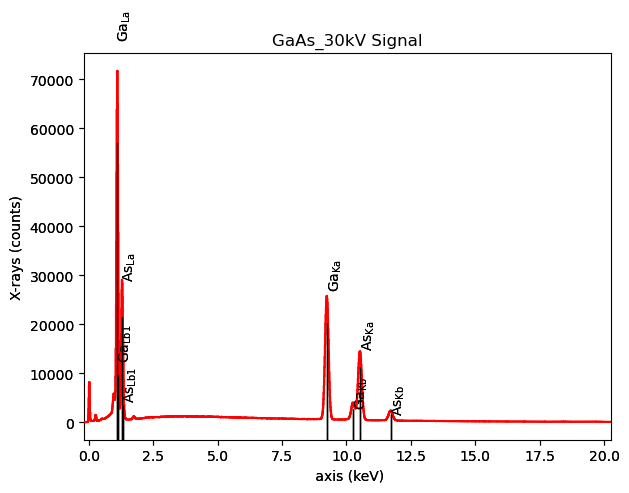

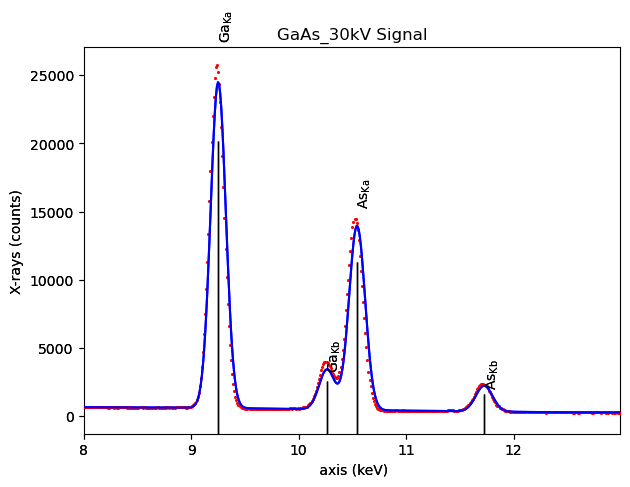

In [13]:
m6 = use_hspy_to_fit_and_plot(
    6, ["Ga", "As"], ["Ga_Ka", "As_Ka"], 8.0, 13.0, xray_lines=True
)

In [14]:
m6.calibrate_energy_axis(calibrate="scale")

The components of the model:
   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |  background_order_6 |  background_order_6 |          Polynomial
   1 |               As_Ka |               As_Ka |            Gaussian
   2 |               As_Kb |               As_Kb |            Gaussian
   3 |               Cu_Ka |               Cu_Ka |            Gaussian
   4 |               Cu_Kb |               Cu_Kb |            Gaussian
   5 |               Ga_Ka |               Ga_Ka |            Gaussian
   6 |               Ga_Kb |               Ga_Kb |            Gaussian
[50965.11266393], <BaseSignal, title: Intensity of As_Ka at 10.54 keV from NW_30kV, dimensions: (1|)>
[40862.05347535], <BaseSignal, title: Intensity of Cu_Ka at 8.05 keV from NW_30kV, dimensions: (1|)>
[68588.2991587], <BaseSignal, title: Intensity of Ga_Ka at 9.25 keV from NW_30kV, dimensions: (1|)>
Plot 1: the whole spectrum
Pl

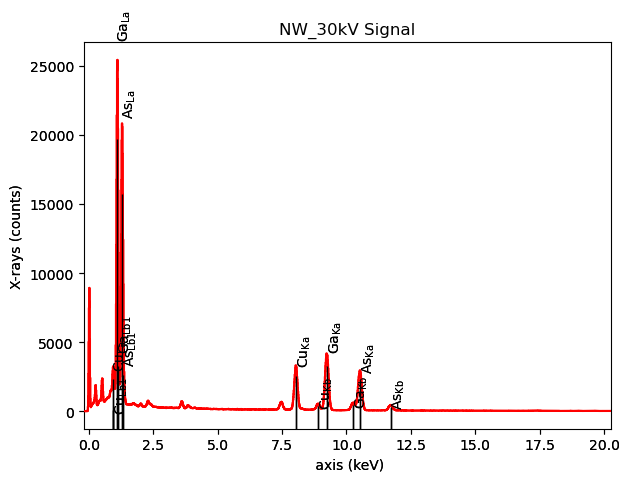

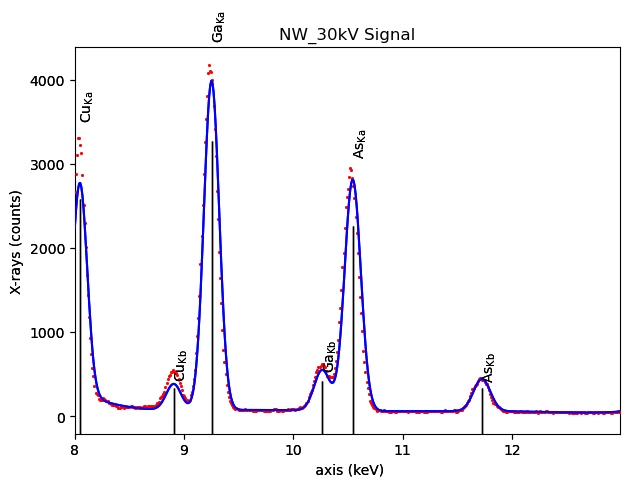

In [15]:
mnw = use_hspy_to_fit_and_plot(
    -6, ["Ga", "As", "Cu"], ["Ga_Ka", "As_Ka", "Cu_Ka"], 8.0, 13.0, xray_lines=True
)

In [16]:
mnw.print_current_values()

Parameter Name,Free,Value,Std,Min,Max,Linear
a0,False,2.23948e+08,2.18747e+07,,,True
a1,False,-1.26589e+08,1.26765e+07,,,True
a2,False,2.97047e+07,3.0475e+06,,,True
a3,False,-3.70369e+06,389007,,,True
a4,False,258795,27806.4,,,True
a5,False,-9608.97,1055.29,,,True
a6,False,148.116,16.6124,,,True
Parameter Name,Free,Value,Std,Min,Max,Linear
A,True,50965.1,833.564,0,,True
centre,False,10.5436,,,,False


In [17]:
# %matplotlib # Using matplotlib backend: QtAgg

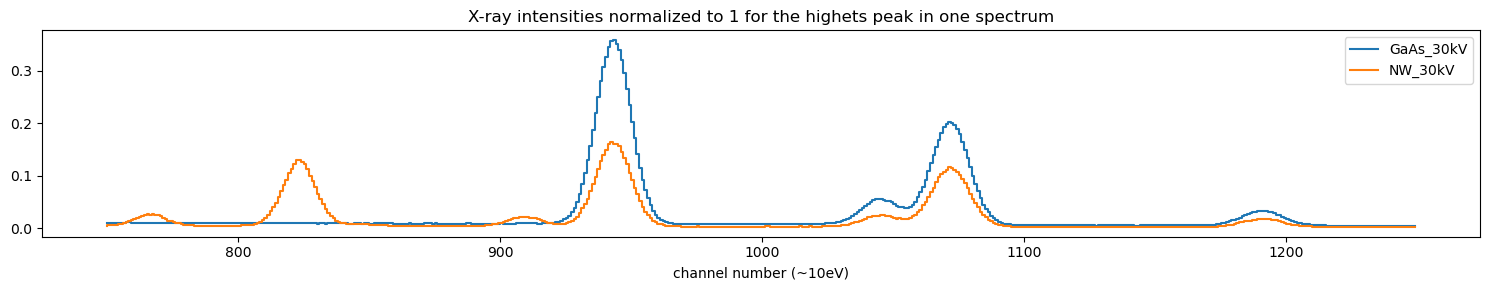

In [18]:
ga30 = get_multiple_data_arrays(filters=["GaAs_30kV", "NW_30kV"])
plot_multiple_spectra(ga30, start=750, stop=1250, normalize=False)

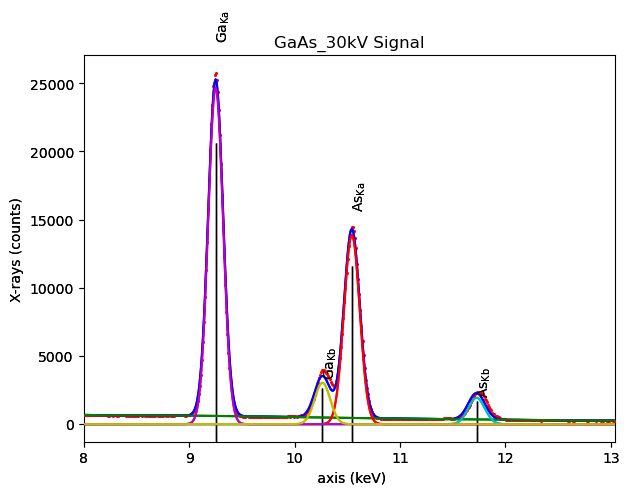

In [19]:
m6.plot(True, xray_lines=True)

In [20]:
m6.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |  background_order_6 |  background_order_6 |          Polynomial
   1 |               As_Ka |               As_Ka |            Gaussian
   2 |               As_Kb |               As_Kb |            Gaussian
   3 |               Ga_Ka |               Ga_Ka |            Gaussian
   4 |               Ga_Kb |               Ga_Kb |            Gaussian

In [21]:
m6.components.Ga_Ka.summary()

A = 432356.8342832497 ± 1134.5650242685028 
centre = 9.2517 ± None 
sigma = 0.07052228949300515 ± 0.0008282142018756355 


In [22]:
# playing with interactive plots

In [23]:
import plotly.express as px
import plotly.graph_objects as go

In [24]:
plotly_plot_multiple_spectra(get_multiple_data_arrays(filters=["NW", "GaAs"]), mode='lines')

In [25]:
# import inspect
# inspect.getsource(plotly_plot_multiple_spectra)   

In [26]:
ga30

[['GaAs_30kV',
  array([0.        , 0.        , 0.        , ..., 0.00078112, 0.00085086,
         0.00072533])],
 ['NW_30kV',
  array([0.        , 0.        , 0.        , ..., 0.00035391, 0.00055053,
         0.00055053])]]

In [27]:
plotly_plot_multiple_spectra(ga30, start=750, stop=1250, split=None)

In [28]:
%load_ext autoreload
%autoreload 2

In [29]:
fig = plotly_plot_multiple_spectra(arrays = get_multiple_data_arrays(every=True), mode='lines')
# fig.write_html("../plots/all_spectra.html")

In [41]:
# plotly_plot_multiple_spectra() takes a 2d list
summed = [sum_multiple_data_arrays(get_multiple_data_arrays(every=True))]


Summed 20 arrays: Cu_10kV, Cu_30kV, Cu_5kV, Fe_30kV, GaAs_10kV, GaAs_15kV, GaAs_30kV, GaAs_5kV, Mo_10kV, Mo_15kV, Mo_30kV, Mo_5kV, NW_10kV, NW_15kV, NW_30kV, NW_5kV, Si_10kV, Si_15kV, Si_30kV, Si_5kV


In [42]:
fig = plotly_plot_multiple_spectra(arrays = summed, mode='lines')
# fig.write_html("../plots/all_spectra_summed.html")

In [28]:
# def plot_perfect_gaussian(
#     fig, center, sigma, height=0.5, color="red", scale=102.4, name="Gaussian"
# ):
#     """
#     Plot a gaussian on a figure.

#     scale = 2048/2000
#     """
#     center *= scale
#     sigma *= scale
#     x = np.linspace(center - 3 * sigma, center + 3 * sigma, 100)
#     y = height * np.exp(-((x - center) ** 2) / (2 * sigma**2))
#     fig.add_trace(go.Scatter(x=x, y=y, mode="lines", name=name, line=dict(color=color)))

#     # alternative
#     # mu = 9.2517*102
#     # variance = 0.07052228949300515*102
#     # sigma = math.sqrt(variance)
#     # # x = np.linspace(0, 2048, 2048)
    # fig.add_trace(go.Scatter(x=x, y=stats.norm.pdf(x, mu, sigma), mode='lines', name='Gaussian'))

In [49]:
# arrays = get_multiple_data_arrays(filters=["GaAs_30kV"])
# start = (0,)
# stop = (2048,)
# x2048 = np.arange(0, 2048, 1)  # making the 2048 long x-axis as channel numbers

# fig = go.Figure()
# for i in range(len(arrays)):
#     fig.add_trace(go.Scatter(x=x, y=arrays[i][1], mode="lines", name=arrays[i][0]))
# ##
# # this one is for the GaAs_30kV, and are more aligned with scale=102 than 102.4
# plot_perfect_gaussian(
#     fig,
#     9.2517,
#     0.07052228949300515,
#     height=0.5,
#     color="red",
#     scale=102.4,
#     name="Gaussian",
# )
# ##
# fig.show()

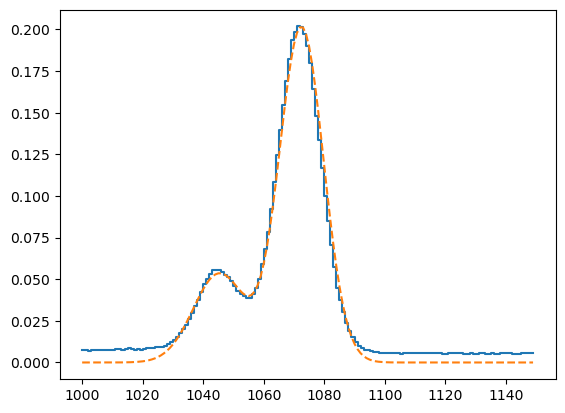

In [61]:
start = 1000
stop = 1150

x = x2048[start:stop]
y = arrays[0][1][start:stop]

init_vals = [1, 1045, 1, 1, 1075, 1]  # for [amp1, cen1, wid1, amp2, cen2, wid2]
best_vals, covar = curve_fit(two_gaussians, x, y, p0=init_vals)

y_est = two_gaussians(
    x,
    best_vals[0],
    best_vals[1],
    best_vals[2],
    best_vals[3],
    best_vals[4],
    best_vals[5],
)

plt.step(x, y)
plt.plot(x, y_est, "--")

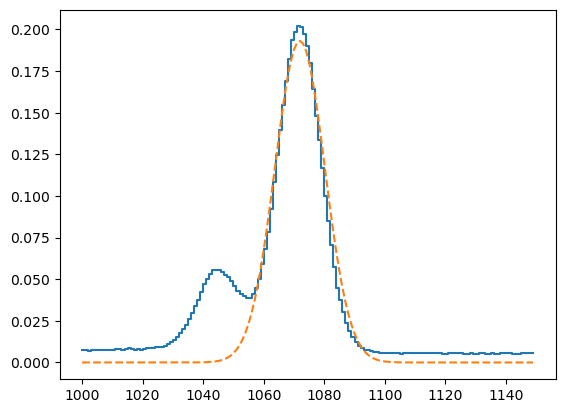

In [60]:
start = 1000
stop = 1150

x = x2048[start:stop]
y = arrays[0][1][start:stop]

init_vals = [1, 1045, 1]  # for [amp1, cen1, wid1, amp2, cen2, wid2]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)

y_est = gaussian(
    x,
    best_vals[0],
    best_vals[1],
    best_vals[2],
)

plt.step(x, y)
plt.plot(x, y_est, "--")

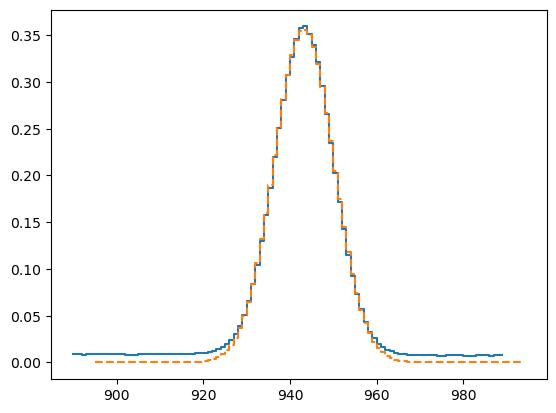

In [79]:
from utils.gaussian_fitting import fit_peak_to_gaussian, fit_two_peaks_to_two_gaussians


start = 890
stop = 990
arrays = get_multiple_data_arrays(filters=["GaAs_30kV"])
x = x2048 = np.arange(0, 2048, 1) # evt ...arange(start, stop, 1)

xy_est = fit_peak_to_gaussian(arrays, 945)



plt.step(x2048[start:stop], arrays[0][1][start:stop])
plt.step(xy_est[0], xy_est[1], "--")



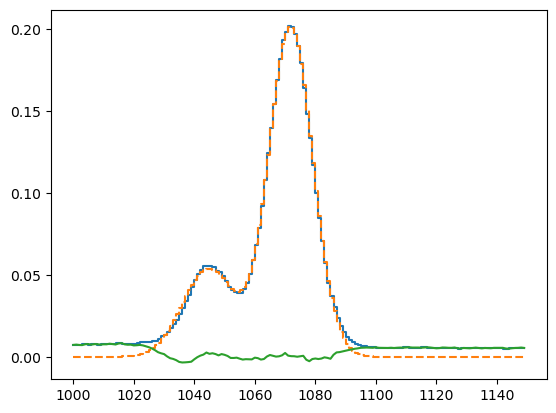

In [87]:
start = 1000
stop = 1150
xy_est = fit_two_peaks_to_two_gaussians(arrays, [1045, 1075], start=start, stop=stop)
arrays = get_multiple_data_arrays(filters=["GaAs_30kV"])
x2048 = np.arange(0, 2048, 1) # evt ...arange(start, stop, 1)

plt.step(x2048[start:stop], arrays[0][1][start:stop])
plt.step(xy_est[0], xy_est[1], "--")
plt.plot(xy_est[0], arrays[0][1][start:stop]- xy_est[1], "-")



In [82]:
arrays[0][1][1100:1140].std()

0.00020084833354915596

In [83]:
arrays[0][1][1100:1140].mean()

0.005513167438486861

In [84]:
arrays[0][1][1000:1020].std()

0.00031879702540993555

In [85]:
arrays[0][1][1000:1020].mean()

0.007710762707136082